Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


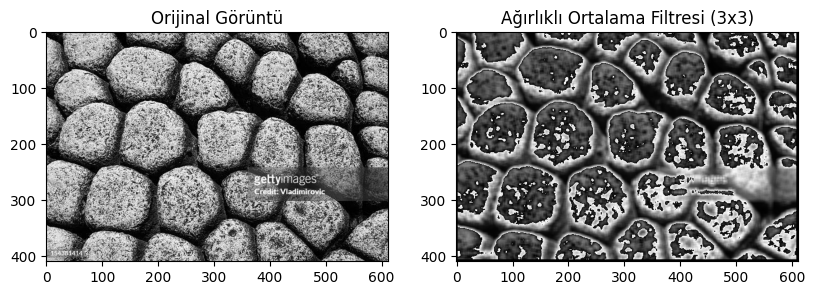

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Google Drive'ı /content/drive altına bağla
drive.mount('/content/drive')

# Görüntüyü yükle
img_path = '/content/drive/MyDrive/GoruntuIsleme/images/stones.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Görüntü başarıyla yüklenmediyse, uygun bir hata mesajı ver
if img is None:
    print("Görüntü yüklenemedi. Dosya adını ve yolunu kontrol edin.")
else:
    # Ağırlıklı Ortalama Filtresi fonksiyonu
    def weighted_average_filter(image, kernel_size):
        height, width = image.shape
        filtered_image = np.zeros_like(image, dtype=float)

        # Ağırlıklı ortalama filtresini uygula
        for i in range(kernel_size, height - kernel_size):
            for j in range(kernel_size, width - kernel_size):
                # Filtre bölgesindeki pikselleri seç
                region = image[i - kernel_size:i + kernel_size + 1, j - kernel_size:j + kernel_size + 1]

                # Ağırlıklı ortalama hesapla
                weighted_sum = np.sum(region)
                total_weight = np.sum(np.arange(1, kernel_size*2 + 2))  # Ağırlıkların toplamı
                filtered_image[i, j] = weighted_sum / total_weight

        return filtered_image.astype(np.uint8)

    # Görüntü boyutları
    height, width = img.shape

    # Ağırlıklı Ortalama Filtresini uygula (kernel boyutu: 3x3)
    img_filtered = weighted_average_filter(img, kernel_size=3)

    # Görüntüleri göster
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Orijinal Görüntü')

    plt.subplot(1, 3, 2)
    plt.imshow(img_filtered, cmap='gray')
    plt.title('Ağırlıklı Ortalama Filtresi (3x3)')

    plt.show()
